# More Examples for Using SpecDB (v2.0)

## Examples are with IGMSpec
    
###   And also use pyigm 
    
https://github.com/pyigm/pyigm)

In [1]:
%matplotlib inline

In [2]:
# import
import os
from astropy import units as u

from specdb import query_catalog as spqcat
from specdb import interface_db as spgidb
from specdb import utils as spdbu
from specdb.specdb import SpecDB, IgmSpec
from specdb import specdb as sdbsdb

from pyigm.surveys.llssurvey import LLSSurvey

## Setup Class

In [3]:
#igmsp = SpecDB(db_file=os.getenv('IGMSPEC_DB')+'/IGMspec_DB_v02.hdf5')
reload(sdbsdb)
igmsp = sdbsdb.IgmSpec()

Database is igmspec
Created on 2017-Jan-05


In [4]:
igmsp.qcat

<QueryCatalog:  Catalog has 403277 sources
   Loaded groups are [u'BOSS_DR12', u'HSTQSO', u'SDSS_DR7', u'KODIAQ_DR1', u'MUSoDLA', u'HD-LLS_DR1', u'2QZ', u'ESI_DLA', u'XQ-100', u'UVES_Dall', u'GGG', u'UVpSM4', u'COS-Halos', u'HST_z2', u'COS-Dwarfs', u'HDLA100'] 
>

## Show a meta data table

In [5]:
meta = igmsp['ESI_DLA'].meta

In [6]:
meta[0:3]

Name,RA_GROUP,DEC_GROUP,Plate,MJD,FiberID,zem_GROUP,r_mag,i_mag,z_mag,ObsDate,Exptime,SN,Slit,Reference,DATE-OBS,sig_zem,flag_zem,EPOCH,STYPE,IGM_ID,SPEC_FILE,NPIX,WV_MIN,WV_MAX,R,GROUP_ID,TELESCOPE,INSTR,DISPERSER
str10,float64,float64,int64,int64,int64,float64,float64,float64,float64,str7,int64,int64,float64,str13,str10,float64,str4,float64,str3,int64,str19,int64,float64,float64,float64,int64,str6,str3,str3
J0007+0041,1.9549,0.6888,4217,55478,800,4.830,21.36,19.95,19.83,8/11/13,1800,10,0.75,Rafelski:2014,2013-08-11,0.0,SDSS,2000.0,QSO,2253,J0007+0041a_xF.fits,27932,3993.5,10132.0,6060.0,0,KeckII,ESI,ECH
J0040-0915,10.2277,-9.2575,655,52162,482,5.000,20.48,19.18,19.1,1/20/10,2280,17,0.5,Rafelski:2012,2010-01-20,0.0,SDSS,2000.0,QSO,303533,J0040-0915a_xF.fits,27929,3993.1,10129.9,9090.0,1,KeckII,ESI,ECH
J0054-0109,13.5893,-1.1560,4224,55481,248,5.090,21.42,20.0,19.57,4/1/13,3600,15,0.75,Rafelski:2014,2013-04-01,0.0,SDSS,2000.0,QSO,14711,J0054-0109a_xF.fits,27931,3992.9,10129.9,6060.0,2,KeckII,ESI,ECH


## Query Source Catalog around Position

### Search around J0040-0915

In [7]:
# Grab catalog info and ID around input coordinate -- All matching within tolerance are returned
matches, sub_cat, ids0040 = igmsp.qcat.query_position(('00:40:54.7','-09:15:27'), 1.*u.arcsec)
sub_cat

Your search yielded 1 match[es] within radius=1 arcsec


flag_group,sig_zem,flag_zem,RA,DEC,STYPE,zem,IGM_ID
int64,float64,str10,float64,float64,str3,float64,int64
662,0.000,SDSS-HW,10.2277,-9.2574,QSO,4.976,303533


In [8]:
# Grab meta data -- By default this returns the first meta data entry in the table (if more than one spectrum exists)
meta0040 = igmsp['ESI_DLA'].cut_meta(ids0040)

In [9]:
meta0040

Name,RA_GROUP,DEC_GROUP,Plate,MJD,FiberID,zem_GROUP,r_mag,i_mag,z_mag,ObsDate,Exptime,SN,Slit,Reference,DATE-OBS,sig_zem,flag_zem,EPOCH,STYPE,IGM_ID,SPEC_FILE,NPIX,WV_MIN,WV_MAX,R,GROUP_ID,TELESCOPE,INSTR,DISPERSER
str10,float64,float64,int64,int64,int64,float64,float64,float64,float64,str7,int64,int64,float64,str13,str10,float64,str4,float64,str3,int64,str19,int64,float64,float64,float64,int64,str6,str3,str3
J0040-0915,10.2277,-9.2575,655,52162,482,5.000,20.48,19.18,19.1,1/20/10,2280,17,0.5,Rafelski:2012,2010-01-20,0.0,SDSS,2000.0,QSO,303533,J0040-0915a_xF.fits,27929,3993.1,10129.9,9090.0,1,KeckII,ESI,ECH


In [10]:
# Grab spectra
#row = igmsp['ESI_DLA'].ids_to_firstrow(ids0812)
J0040spec = igmsp['ESI_DLA'].spec_from_meta(meta0040)
J0040spec

Staged 1 spectra totalling 0.0008 Gb
Loaded spectra


/Users/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:248: UserWarning: No unit given to wavelength, assuming Angstroms.
  warnings.warn("No unit given to wavelength, assuming Angstroms.")


<XSpectrum1D: file=none, nspec=1, select=0, wvmin=3993.13 Angstrom, wvmax=10129.9 Angstrom>

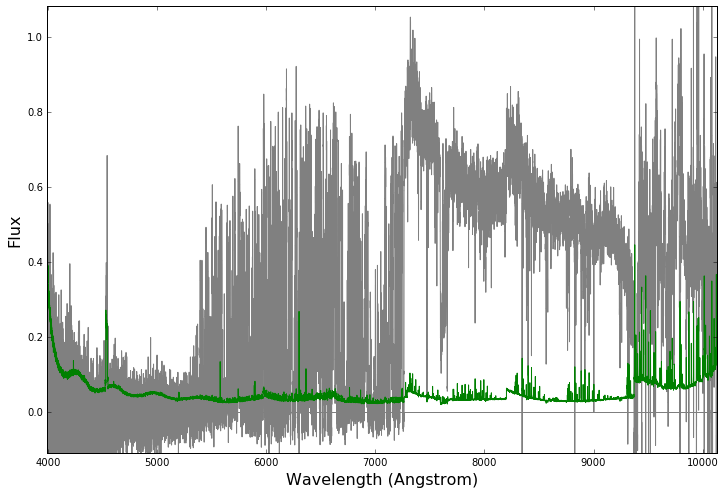

In [11]:
J0040spec.plot(inline=True)

### Search around J233446.40-090812.3

In [12]:
matches, sub_cat, ids2334 = igmsp.qcat.query_position('J233446.40-090812.3', 1.*u.arcsec)
sub_cat

Your search yielded 1 match[es] within radius=1 arcsec


flag_group,sig_zem,flag_zem,RA,DEC,STYPE,zem,IGM_ID
int64,float64,str10,float64,float64,str3,float64,int64
8206,0.000,SDSS-HW,353.6933,-9.1367,QSO,3.327,381591


In [13]:
# Grab all meta from the HD-LLS_DR1 group
meta2334 = igmsp['HD-LLS_DR1'].cut_meta(ids2334, first=False)

In [14]:
meta2334[['QSO', 'INSTR', 'SPEC_FILE']]

QSO,INSTR,SPEC_FILE
str19,str5,str37
SDSSJ2334-0908,ESI,HD-LLS_J233446.40-090812.3_ESI.fits
SDSSJ2334-0908,HIRES,HD-LLS_J233446.40-090812.3_HIRES.fits
SDSSJ2334-0908,MagE,HD-LLS_J233446.40-090812.3_MAGE.fits


In [15]:
# Grab all spectra from that group
J2334spec = igmsp['HD-LLS_DR1'].spec_from_meta(meta2334)

Staged 3 spectra totalling 0.01008 Gb
Loaded spectra


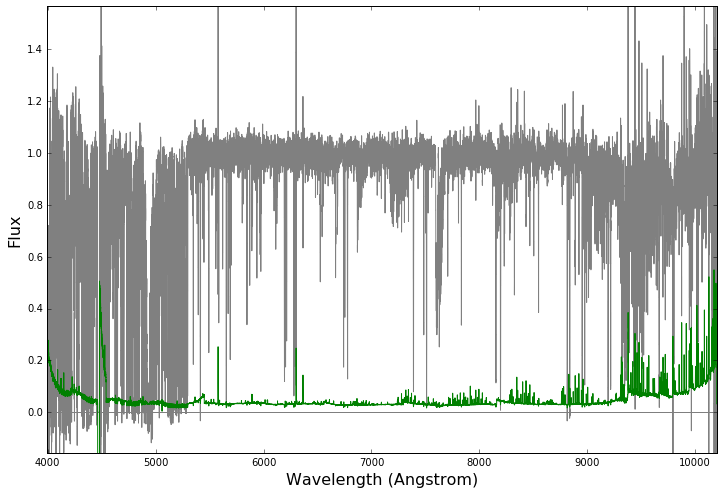

In [16]:
# Plot the first one (ESI)
J2334spec.plot(inline=True)

----

In [17]:
# Another approach -- Query the full database and then pare down
J2334spec, meta = igmsp.spectra_from_coord('J233446.40-090812.3')
meta[['GROUP','TELESCOPE','INSTR']]

Your search yielded 1 match[es] within radius=0.5 arcsec
Staged 3 spectra totalling 0.01008 Gb
Loaded spectra
Staged 2 spectra totalling 0.0064 Gb
Loaded spectra
Staged 1 spectra totalling 0.00368 Gb
Loaded spectra


/Users/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:222: RuntimeWarning: invalid value encountered in greater
  gdsigval = np.where(self.data['sig'][kk].data > 0.)[0]
/Users/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:223: RuntimeWarning: invalid value encountered in less_equal
  badsigval = self.data['sig'][kk].data <= 0.
/Users/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:434: RuntimeWarning: invalid value encountered in greater
  gdpx = self.sig > 0.


Staged 1 spectra totalling 8e-05 Gb
Loaded spectra


GROUP,TELESCOPE,INSTR
str10,str13,str8
SDSS_DR7,SDSS 2.5-M,SDSS
KODIAQ_DR1,Keck-I,HIRES
KODIAQ_DR1,Keck-I,HIRES
MUSoDLA,VLT,UVES
HD-LLS_DR1,Keck-II,ESI
HD-LLS_DR1,Keck-I,HIRES
HD-LLS_DR1,Magellan/Clay,MagE


In [18]:
J2334spec.select = 4
J2334spec

<XSpectrum1D: file=none, nspec=7, select=4, wvmin=3995.02 Angstrom, wvmax=10199.8 Angstrom>

In [19]:
# Another approach -- Query the database on only the HD-LLS group (ESI is the first one)
J2334spec, meta = igmsp.spectra_from_coord('J233446.40-090812.3', groups=['HD-LLS_DR1'])
J2334spec

Your search yielded 1 match[es] within radius=0.5 arcsec
Staged 3 spectra totalling 0.01008 Gb
Loaded spectra


<XSpectrum1D: file=none, nspec=3, select=0, wvmin=3995.02 Angstrom, wvmax=10199.8 Angstrom>

## Simple catalog search

### LLS from SDSS_DR7 vs. IGMspec

In [20]:
sdss_dr7_all = LLSSurvey.load_SDSS_DR7(sample='all')
sdss_dr7_all

SDSS-DR7: Loading LLS file /Users/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_stat_LLS.fits.gz
SDSS-DR7: Loading QSOs file /Users/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_qsos_sn2050.fits.gz


<IGMSurvey: nsys=1935, type=LLS, ref=SDSS-DR7, nsightlines=3759>

In [21]:
# Grab the coord
lls_coord = sdss_dr7_all.coord
lls_coord

<SkyCoord (ICRS): (ra, dec) in deg
    [( 339.61320833,   1.39090556e+01), ( 160.36441667,   2.65569444e+00),
     ( 167.247     ,   3.19108333e+00), ...,
     ( 230.02470833,   2.36647222e+01), ( 124.528625  ,   7.32227778e+00),
     ( 150.86345833,   2.29700556e+01)]>

In [22]:
# Match -- Sources that don't match are given a -1 ID
matches, sub_cat, lls_ids = igmsp.qcat.query_coords(lls_coord)
lls_ids

Your search yielded 1931 matches from 1935 input coordinates


array([278984, 333498, 337018, ..., 238162,  52737,  96919])

In [23]:
# Show cat
sub_cat[0:5]

flag_group,sig_zem,flag_zem,RA,DEC,STYPE,zem,IGM_ID
int64,float64,str10,float64,float64,str3,float64,int64
3,0.00202852169918,BOSS_PCA,339.613239092,13.9090722756,QSO,3.55330134648,278984
2,0.0,SDSS-HW,160.364469,2.655675,QSO,3.5929210186,333498
2,0.0,SDSS-HW,167.247083,3.191095,QSO,3.46423006058,337018
3,0.00167885941355,BOSS_PCA,139.502742418,51.3620978521,QSO,3.4610699635,77086
3,0.00255769601315,BOSS_PCA,135.119471001,48.3169094303,QSO,3.62596088017,70133


## Meta data and spectra from Coordinates

### All meta data

In [24]:
# Grab meta 
matches, all_meta = igmsp.meta_from_coords(lls_coord)
np.unique(all_meta['GROUP'].data)

Your search yielded 1931 matches from 1935 input coordinates


/Users/xavier/local/Python/specdb/specdb/utils.py:59: UserWarning: Renaming column in table XQ-100 from SNR_1700 to XQ-100_SNR_1700
  warnings.warn("Renaming column in table {:s} from {:s} to {:s}".format(labels[ss], key, new_name))
/Users/xavier/local/Python/specdb/specdb/utils.py:59: UserWarning: Renaming column in table XQ-100 from SNR_3000 to XQ-100_SNR_3000
  warnings.warn("Renaming column in table {:s} from {:s} to {:s}".format(labels[ss], key, new_name))


Final query yielded 1931 matches.


masked_BaseColumn(data = ['BOSS_DR12' 'ESI_DLA' 'GGG' 'HD-LLS_DR1' 'HDLA100' 'KODIAQ_DR1' 'MUSoDLA'
 -- 'SDSS_DR7' 'XQ-100'],
                  mask = [False False False False False False False  True False False],
            fill_value = N/A)

# Restrict to GGG

In [25]:
matches, all_meta = igmsp.meta_from_coords(lls_coord, groups=['GGG'])
np.unique(all_meta['GROUP'].data)

Your search yielded 102 matches from 1935 input coordinates
Final query yielded 102 matches.


masked_BaseColumn(data = ['GGG' --],
                  mask = [False  True],
            fill_value = N/A)

In [26]:
LLSspec = igmsp.spectra_from_meta(all_meta[matches])

Staged 102 spectra totalling 0.0026112 Gb
Loaded spectra


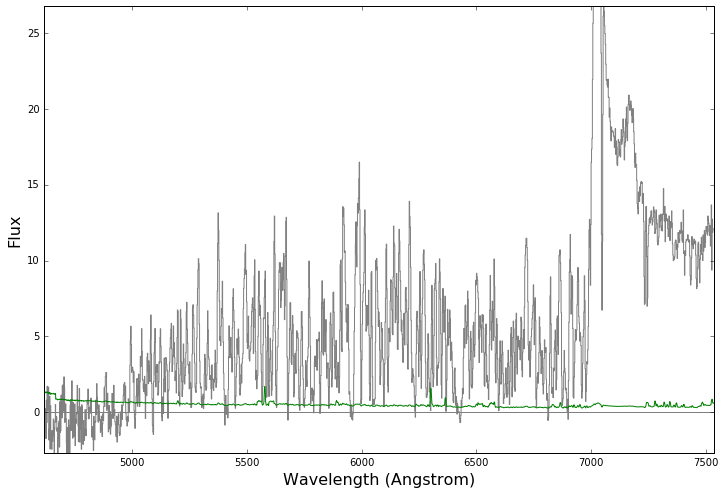

In [27]:
# Show the first spectrum
LLSspec.plot(inline=True)

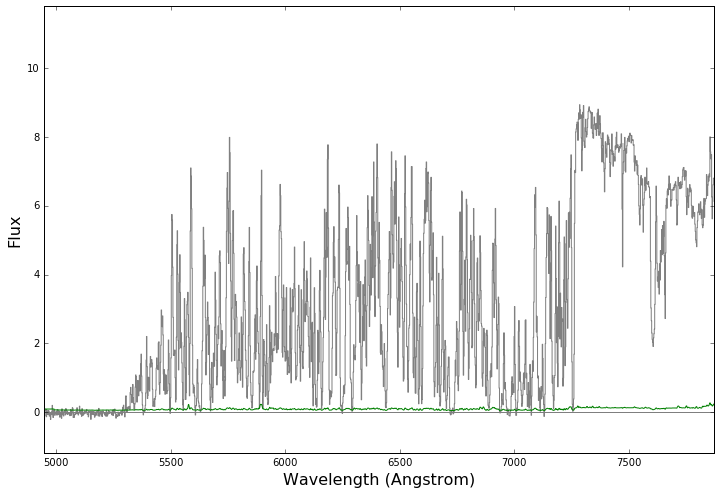

In [28]:
# Show the 10th spectrum
LLSspec.select=9
LLSspec.plot(inline=True)

----

## Time Evolution

In [29]:
ids_time, _ = igmsp.qcat.find_ids_in_groups(['GGG', 'SDSS_DR7'])

In [30]:
igmsp.qcat.show_cat(ids_time)

IGM_ID    RA      DEC     zem   flag_group sig_zem  flag_zem STYPE
------ -------- -------- ------ ---------- ------- --------- -----
  3244   2.8135  14.7672  4.986       8211   0.003 BOSS_PCA    QSO
 17656  16.5802   0.8065  4.432         27   0.001 BOSS_PCA    QSO
 32720  32.6799  -0.3051  4.745        531  -1.000 BOSS_PCA    QSO
 36731  37.9069  -7.4818  5.412        531  -1.000 BOSS_PCA    QSO
 41217 112.7630  44.9971  4.986         19   0.003 BOSS_PCA    QSO
 46146 119.7816  18.0152  4.784        531   0.006 BOSS_PCA    QSO
 46495 120.0959  30.8504  4.667         19   0.002 BOSS_PCA    QSO
 48706 121.8130  13.4681  4.860         19   0.006 BOSS_PCA    QSO
 52737 124.5287   7.3223  4.603         19   0.004 BOSS_PCA    QSO
 54333 125.5515  16.0769  4.472         19   0.003 BOSS_PCA    QSO
   ...      ...      ...    ...        ...     ...       ...   ...
359994 215.4374  35.2210  4.563         18   0.000   SDSS-HW   QSO
363389 222.7831   2.9377  4.482         18   0.000   SDSS-HW  

In [31]:
# Loop to grab spectra and meta data from each group
spec_time, meta_time = [], []
for group in ['GGG', 'SDSS_DR7']:
    rows = igmsp[group].ids_to_firstrow(ids_time)
    spec, meta = igmsp[group].grab_specmeta(rows)
    # Append
    spec_time.append(spec)
    meta_time.append(meta)

Staged 163 spectra totalling 0.0041728 Gb
Loaded spectra
Staged 163 spectra totalling 0.01304 Gb
Loaded spectra


In [32]:
spec_time

[<XSpectrum1D: file=none, nspec=163, select=0, wvmin=4911.03 Angstrom, wvmax=7831.05 Angstrom>,
 <XSpectrum1D: file=none, nspec=163, select=0, wvmin=3810.66 Angstrom, wvmax=9215.1 Angstrom>]

### Plot both

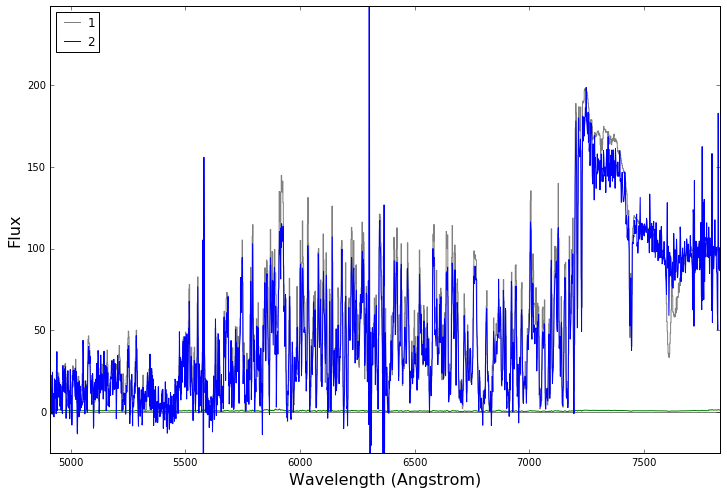

In [33]:
spec_time[0].plot(plot_two=spec_time[1],inline=True, scale_two=10)

----

## Pairs

### QPQ8 like

#### Query on separation (angular and redshift)

In [34]:
ID_fg, ID_bg = igmsp.qcat.pairs(30*u.arcsec, 3000.*u.km/u.s)

In [35]:
igmsp.qcat.show_cat(ID_fg)

IGM_ID    RA      DEC     zem   flag_group sig_zem  flag_zem STYPE
------ -------- -------- ------ ---------- ------- --------- -----
   291   0.2461  28.3758  0.985          1  -1.000 BOSS_PCA    QSO
   431   0.3669   8.6782  2.794          1   0.003 BOSS_PCA    QSO
   848   0.7280  21.6517  1.877          1  -1.000 BOSS_PCA    QSO
  1003   0.8555  13.4381  0.628          1  -1.000 BOSS_PCA    QSO
  1635   1.3680  25.7650  2.545          1  -1.000 BOSS_PCA    QSO
  2487   2.1692  17.1640  1.380          1  -1.000 BOSS_PCA    QSO
  2745   2.3791  17.4591  0.665          1  -1.000 BOSS_PCA    QSO
  2827   2.4458  12.0703  2.254          1   0.002 BOSS_PCA    QSO
  2869   2.4857  26.2747  1.997          1   0.001 BOSS_PCA    QSO
  2937   2.5424  32.9975  2.043          1  -1.000 BOSS_PCA    QSO
   ...      ...      ...    ...        ...     ...       ...   ...
398612 333.7025 -29.0618  1.933        256   0.000       2QZ   QSO
399056 336.1957 -32.0044  0.686        256   0.000       2QZ  

#### Check for high dispersion spectrum in b/g QSOs

In [36]:
highdisp_bg, in_highdisp = igmsp.qcat.find_ids_in_groups(['HD-LLS_DR1', 'KODIAQ_DR1'], IDs=ID_bg, in_all=False)

In [37]:
highdisp_bg

382410


In [38]:
igmsp.qcat.show_cat(highdisp_bg)

IGM_ID    RA      DEC     zem   flag_group sig_zem flag_zem STYPE
------ -------- -------- ------ ---------- ------- -------- -----
382410  73.0567 -16.6700  2.684          4   0.000   SIMBAD   QSO
----------
Group key:
    BOSS_DR12: 1
    HSTQSO: 4096
    SDSS_DR7: 2
    KODIAQ_DR1: 4
    MUSoDLA: 8192
    HD-LLS_DR1: 8
    2QZ: 256
    ESI_DLA: 512
    XQ-100: 64
    UVES_Dall: 16384
    GGG: 16
    UVpSM4: 32768
    COS-Halos: 1024
    HST_z2: 32
    COS-Dwarfs: 2048
    HDLA100: 128


In [39]:
igmsp.qcat.show_cat(ID_fg[in_highdisp])

IGM_ID    RA      DEC     zem   flag_group sig_zem flag_zem STYPE
------ -------- -------- ------ ---------- ------- -------- -----
402914  73.0593 -16.6713  2.600       4096   0.000    UNKWN   QSO
----------
Group key:
    BOSS_DR12: 1
    HSTQSO: 4096
    SDSS_DR7: 2
    KODIAQ_DR1: 4
    MUSoDLA: 8192
    HD-LLS_DR1: 8
    2QZ: 256
    ESI_DLA: 512
    XQ-100: 64
    UVES_Dall: 16384
    GGG: 16
    UVpSM4: 32768
    COS-Halos: 1024
    HST_z2: 32
    COS-Dwarfs: 2048
    HDLA100: 128
